# Basic modelling module

In [1]:
# make plots be included into this doc
%matplotlib inline

# Importing modules

In [2]:
import numpy as np
import pandas as pd
import os
from IPython.core.display import display, HTML
from bin.model import *
from sklearn.pipeline import Pipeline
from bin.conf import PREDICTOR_LOADERS
from bin.loader import get_predictor_data

# Constants definitions

In [3]:
SOURCE_DATA_PATH = './data' # relative (or absolute) path to the data directory
CSV_SEPARATOR = r'\t' # separator used in csv data files
DATA_FILE_NAMES = ['broad_leaf_GBIF.csv', 'широколиственные.csv'] # all data files should be in the same format
ALLOWED_COLUMNS = ['species', 'latitude', 'longitude'] # only these columns will be retained for computations
COLUMNS_DTYPES = [np.str, np.float64, np.float64] # Should have the same length as ALLOWED_COLUMNS
MODEL_SPECIES = ['quercus mongolica', 'fraxinus mandshurica'] # all  species should be given in lowercase format

# Initial set of variables (see conf.py: PREDICTOR_LOADERS parameter for details)
VARIABLE_SET = tuple(['BIO' + str(k) for k in range(1, 20)])
VARIABLE_SET += ('WKI5', 'CKI5', 'PWKI0', 'PCKI0','IT', 'IC', 'TMINM', 'TMAXM')

#VARIABLE_SET += tuple(['PREC' + str(k) for k in range(1, 13)])
#VARIABLE_SET += tuple(['TAVG' + str(k) for k in range(1, 13)])
#VARIABLE_SET += tuple(['WKI' + str(k) for k in range(2, 7)])
#VARIABLE_SET += tuple(['CKI' + str(k) for k in range(2, 7)])

# Source data loading and preprocessing

In [4]:
original_presence_data = pd.DataFrame({col: [] for col in ALLOWED_COLUMNS}) #initialize dataframe-accumulator
for filename in DATA_FILE_NAMES:
    try:
        # data loading procedure
        data = pd.read_csv(os.path.join(SOURCE_DATA_PATH, filename),
                           sep=CSV_SEPARATOR, dtype={a:b for a,b in zip(ALLOWED_COLUMNS, COLUMNS_DTYPES)})
    except IOError:
        print("Couldn't read the file %s." % filename)
    if any(data):
        print('The file %s succesfully loaded.' % filename)
        print('File overview:')
        data.info()
        print('='*50)
    # data concatenation procedure
    original_presence_data = pd.concat([original_presence_data, data[ALLOWED_COLUMNS]], ignore_index=True)



# make species names lowercased and stripped
original_presence_data['species'] = original_presence_data['species'].apply(str.lower).apply(str.strip)

display(HTML('<h3>Original size: %s</h3>'%original_presence_data['species'].size))

# remove duplicate rows and nan values
original_presence_data = original_presence_data.dropna().drop_duplicates(ALLOWED_COLUMNS).reset_index(drop=True)
display(HTML('<h3>The size after duplications removal: %s</h3>'%original_presence_data['species'].size))


# remove duplicate values


The file broad_leaf_GBIF.csv succesfully loaded.
File overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3036 entries, 0 to 3035
Data columns (total 4 columns):
species        3036 non-null object
countrycode    3036 non-null object
latitude       3034 non-null float64
longitude      3034 non-null float64
dtypes: float64(2), object(2)
memory usage: 95.0+ KB
The file широколиственные.csv succesfully loaded.
File overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 3 columns):
species      605 non-null object
latitude     604 non-null float64
longitude    604 non-null float64
dtypes: float64(2), object(1)
memory usage: 14.3+ KB


/home/dmitry/.pyenv/versions/3.5.4/envs/sci/lib/python3.5/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


## Initial dataset overview

In [5]:
display(HTML('<h3>General info:</h3>'))
original_presence_data.info()
display(HTML('<h3>Species occurences overview:</h3>'))
original_presence_data['species'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 3 columns):
latitude     2042 non-null float64
longitude    2042 non-null float64
species      2042 non-null object
dtypes: float64(2), object(1)
memory usage: 47.9+ KB


quercus mongolica         329
kalopanax septemlobus     292
carpinus cordata          285
fraxinus lanuginosa       274
juglans mandshurica       269
quercus crispula          158
phellodendron amurense    144
ulmus davidiana           130
acer pictum                75
fraxinus mandshurica       40
juglans ailanthifolia      22
tilia amurensis            11
abies holophylla            8
quercus crispula blume      5
Name: species, dtype: int64

# MAIN LOOP OVER ALL SPECIES

In [6]:
for species in MODEL_SPECIES:
    display(HTML('<h5>=============== %s ======================</h5>'%species))
    
    


feature_selector = Pipeline([('select_species', SelectSpecies('quercus')), 
                             ('fillenv', TreeFeatureImportance(VARIABLE_SET)),
                             ])

dd = feature_selector.fit_transform(original_presence_data)

Performing iterations of the feature selection procedure.
Current iteration is  0


/home/dmitry/workspace/pacific_sdm/bin/loader.py:59: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + vals[vals > t] - t
/home/dmitry/workspace/pacific_sdm/bin/loader.py:65: RuntimeWarning: invalid value encountered in less
  result[vals < t] = result[vals < t] + vals[vals < t] - t
/home/dmitry/workspace/pacific_sdm/bin/loader.py:87: RuntimeWarning: invalid value encountered in greater
  if np.any(vals > t):
/home/dmitry/workspace/pacific_sdm/bin/loader.py:89: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + precs[vals > t]
/home/dmitry/workspace/pacific_sdm/bin/loader.py:94: RuntimeWarning: invalid value encountered in less
  if np.any(vals < t):
/home/dmitry/workspace/pacific_sdm/bin/loader.py:96: RuntimeWarning: invalid value encountered in less
  result[vals < t] = result[vals < t] + precs[vals < t]
/home/dmitry/workspace/pacific_sdm/bin/loader.py:133: RuntimeWarning: invalid value encountered i

Current iteration is  1


/home/dmitry/workspace/pacific_sdm/bin/loader.py:59: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + vals[vals > t] - t
/home/dmitry/workspace/pacific_sdm/bin/loader.py:65: RuntimeWarning: invalid value encountered in less
  result[vals < t] = result[vals < t] + vals[vals < t] - t
/home/dmitry/workspace/pacific_sdm/bin/loader.py:87: RuntimeWarning: invalid value encountered in greater
  if np.any(vals > t):
/home/dmitry/workspace/pacific_sdm/bin/loader.py:89: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + precs[vals > t]
/home/dmitry/workspace/pacific_sdm/bin/loader.py:94: RuntimeWarning: invalid value encountered in less
  if np.any(vals < t):
/home/dmitry/workspace/pacific_sdm/bin/loader.py:96: RuntimeWarning: invalid value encountered in less
  result[vals < t] = result[vals < t] + precs[vals < t]
/home/dmitry/workspace/pacific_sdm/bin/loader.py:133: RuntimeWarning: invalid value encountered i

Current iteration is  2


/home/dmitry/workspace/pacific_sdm/bin/loader.py:59: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + vals[vals > t] - t
/home/dmitry/workspace/pacific_sdm/bin/loader.py:65: RuntimeWarning: invalid value encountered in less
  result[vals < t] = result[vals < t] + vals[vals < t] - t
/home/dmitry/workspace/pacific_sdm/bin/loader.py:87: RuntimeWarning: invalid value encountered in greater
  if np.any(vals > t):
/home/dmitry/workspace/pacific_sdm/bin/loader.py:89: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + precs[vals > t]
/home/dmitry/workspace/pacific_sdm/bin/loader.py:94: RuntimeWarning: invalid value encountered in less
  if np.any(vals < t):
/home/dmitry/workspace/pacific_sdm/bin/loader.py:96: RuntimeWarning: invalid value encountered in less
  result[vals < t] = result[vals < t] + precs[vals < t]
/home/dmitry/workspace/pacific_sdm/bin/loader.py:133: RuntimeWarning: invalid value encountered i

Current iteration is  3

/home/dmitry/workspace/pacific_sdm/bin/loader.py:59: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + vals[vals > t] - t
/home/dmitry/workspace/pacific_sdm/bin/loader.py:65: RuntimeWarning: invalid value encountered in less
  result[vals < t] = result[vals < t] + vals[vals < t] - t
/home/dmitry/workspace/pacific_sdm/bin/loader.py:87: RuntimeWarning: invalid value encountered in greater
  if np.any(vals > t):
/home/dmitry/workspace/pacific_sdm/bin/loader.py:89: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + precs[vals > t]
/home/dmitry/workspace/pacific_sdm/bin/loader.py:94: RuntimeWarning: invalid value encountered in less
  if np.any(vals < t):
/home/dmitry/workspace/pacific_sdm/bin/loader.py:96: RuntimeWarning: invalid value encountered in less
  result[vals < t] = result[vals < t] + precs[vals < t]
/home/dmitry/workspace/pacific_sdm/bin/loader.py:133: RuntimeWarning: invalid value encountered i


Current iteration is  4


/home/dmitry/workspace/pacific_sdm/bin/loader.py:59: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + vals[vals > t] - t
/home/dmitry/workspace/pacific_sdm/bin/loader.py:65: RuntimeWarning: invalid value encountered in less
  result[vals < t] = result[vals < t] + vals[vals < t] - t
/home/dmitry/workspace/pacific_sdm/bin/loader.py:87: RuntimeWarning: invalid value encountered in greater
  if np.any(vals > t):
/home/dmitry/workspace/pacific_sdm/bin/loader.py:89: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + precs[vals > t]
/home/dmitry/workspace/pacific_sdm/bin/loader.py:94: RuntimeWarning: invalid value encountered in less
  if np.any(vals < t):
/home/dmitry/workspace/pacific_sdm/bin/loader.py:96: RuntimeWarning: invalid value encountered in less
  result[vals < t] = result[vals < t] + precs[vals < t]
/home/dmitry/workspace/pacific_sdm/bin/loader.py:133: RuntimeWarning: invalid value encountered i

Current iteration is  5


/home/dmitry/workspace/pacific_sdm/bin/loader.py:59: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + vals[vals > t] - t
/home/dmitry/workspace/pacific_sdm/bin/loader.py:65: RuntimeWarning: invalid value encountered in less
  result[vals < t] = result[vals < t] + vals[vals < t] - t
/home/dmitry/workspace/pacific_sdm/bin/loader.py:87: RuntimeWarning: invalid value encountered in greater
  if np.any(vals > t):
/home/dmitry/workspace/pacific_sdm/bin/loader.py:89: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + precs[vals > t]
/home/dmitry/workspace/pacific_sdm/bin/loader.py:94: RuntimeWarning: invalid value encountered in less
  if np.any(vals < t):
/home/dmitry/workspace/pacific_sdm/bin/loader.py:96: RuntimeWarning: invalid value encountered in less
  result[vals < t] = result[vals < t] + precs[vals < t]
/home/dmitry/workspace/pacific_sdm/bin/loader.py:133: RuntimeWarning: invalid value encountered i

Current iteration is  6


/home/dmitry/workspace/pacific_sdm/bin/loader.py:59: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + vals[vals > t] - t
/home/dmitry/workspace/pacific_sdm/bin/loader.py:65: RuntimeWarning: invalid value encountered in less
  result[vals < t] = result[vals < t] + vals[vals < t] - t
/home/dmitry/workspace/pacific_sdm/bin/loader.py:87: RuntimeWarning: invalid value encountered in greater
  if np.any(vals > t):
/home/dmitry/workspace/pacific_sdm/bin/loader.py:89: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + precs[vals > t]
/home/dmitry/workspace/pacific_sdm/bin/loader.py:94: RuntimeWarning: invalid value encountered in less
  if np.any(vals < t):
/home/dmitry/workspace/pacific_sdm/bin/loader.py:96: RuntimeWarning: invalid value encountered in less
  result[vals < t] = result[vals < t] + precs[vals < t]
/home/dmitry/workspace/pacific_sdm/bin/loader.py:133: RuntimeWarning: invalid value encountered i

Current iteration is  7


/home/dmitry/workspace/pacific_sdm/bin/loader.py:59: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + vals[vals > t] - t
/home/dmitry/workspace/pacific_sdm/bin/loader.py:65: RuntimeWarning: invalid value encountered in less
  result[vals < t] = result[vals < t] + vals[vals < t] - t
/home/dmitry/workspace/pacific_sdm/bin/loader.py:87: RuntimeWarning: invalid value encountered in greater
  if np.any(vals > t):
/home/dmitry/workspace/pacific_sdm/bin/loader.py:89: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + precs[vals > t]
/home/dmitry/workspace/pacific_sdm/bin/loader.py:94: RuntimeWarning: invalid value encountered in less
  if np.any(vals < t):
/home/dmitry/workspace/pacific_sdm/bin/loader.py:96: RuntimeWarning: invalid value encountered in less
  result[vals < t] = result[vals < t] + precs[vals < t]
/home/dmitry/workspace/pacific_sdm/bin/loader.py:133: RuntimeWarning: invalid value encountered i

Current iteration is  8


/home/dmitry/workspace/pacific_sdm/bin/loader.py:59: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + vals[vals > t] - t
/home/dmitry/workspace/pacific_sdm/bin/loader.py:65: RuntimeWarning: invalid value encountered in less
  result[vals < t] = result[vals < t] + vals[vals < t] - t
/home/dmitry/workspace/pacific_sdm/bin/loader.py:87: RuntimeWarning: invalid value encountered in greater
  if np.any(vals > t):
/home/dmitry/workspace/pacific_sdm/bin/loader.py:89: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + precs[vals > t]
/home/dmitry/workspace/pacific_sdm/bin/loader.py:94: RuntimeWarning: invalid value encountered in less
  if np.any(vals < t):
/home/dmitry/workspace/pacific_sdm/bin/loader.py:96: RuntimeWarning: invalid value encountered in less
  result[vals < t] = result[vals < t] + precs[vals < t]
/home/dmitry/workspace/pacific_sdm/bin/loader.py:133: RuntimeWarning: invalid value encountered i

Current iteration is  9


/home/dmitry/workspace/pacific_sdm/bin/loader.py:59: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + vals[vals > t] - t
/home/dmitry/workspace/pacific_sdm/bin/loader.py:65: RuntimeWarning: invalid value encountered in less
  result[vals < t] = result[vals < t] + vals[vals < t] - t
/home/dmitry/workspace/pacific_sdm/bin/loader.py:87: RuntimeWarning: invalid value encountered in greater
  if np.any(vals > t):
/home/dmitry/workspace/pacific_sdm/bin/loader.py:89: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + precs[vals > t]
/home/dmitry/workspace/pacific_sdm/bin/loader.py:94: RuntimeWarning: invalid value encountered in less
  if np.any(vals < t):
/home/dmitry/workspace/pacific_sdm/bin/loader.py:96: RuntimeWarning: invalid value encountered in less
  result[vals < t] = result[vals < t] + precs[vals < t]
/home/dmitry/workspace/pacific_sdm/bin/loader.py:133: RuntimeWarning: invalid value encountered i

Iterations finished.


In [7]:
vars=np.array(feature_selector.named_steps['fillenv'].feature_importances_)


for x,var in zip(vars[np.argsort(vars)[::-1]], np.array(VARIABLE_SET)[np.argsort(vars)[::-1]]):
    print(var + ':', x)

PWKI0: 0.09064692237569927
BIO18: 0.07726616826013968
CKI5: 0.07510480739151669
BIO16: 0.07058022209370746
BIO1: 0.06802441261789202
BIO12: 0.059505364646171635
IT: 0.05861977696478403
TMINM: 0.049131047297237496
WKI5: 0.04697102821638753
BIO13: 0.04686135488804647
BIO4: 0.045943828857702665
BIO6: 0.0442677351331192
BIO11: 0.04261490519013809
BIO10: 0.03163107384424413
BIO7: 0.02648560948196855
TMAXM: 0.02369475650760783
IC: 0.023301836806240504
BIO8: 0.021886244085230648
BIO5: 0.0182188930616752
BIO17: 0.017741906343371923
BIO9: 0.01459847391556438
BIO14: 0.01292520482626825
BIO2: 0.010123948249226657
BIO15: 0.007026419608146891
PCKI0: 0.006007810890104933
BIO19: 0.00596132538137939
BIO3: 0.00485892306642851


In [8]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 3 columns):
latitude     492 non-null float64
longitude    492 non-null float64
species      492 non-null object
dtypes: float64(2), object(1)
memory usage: 11.6+ KB


In [9]:
SELECTED = ['PWKI0', 'CKI5', 'BIO16', 'BIO1', 'BIO12', 'IT', 'TMINM','WKI5']

from sklearn.linear_model import LogisticRegression
model = Pipeline([('select_species', SelectSpecies('quercus')), 
                  ('ps_absence', FillPseudoAbsenceData()),
                  ('fill_env', FillEnvironmentalData(SELECTED))])

model.fit_transform(original_presence_data)

/home/dmitry/workspace/pacific_sdm/bin/loader.py:87: RuntimeWarning: invalid value encountered in greater
  if np.any(vals > t):
/home/dmitry/workspace/pacific_sdm/bin/loader.py:89: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + precs[vals > t]
/home/dmitry/workspace/pacific_sdm/bin/loader.py:65: RuntimeWarning: invalid value encountered in less
  result[vals < t] = result[vals < t] + vals[vals < t] - t
/home/dmitry/workspace/pacific_sdm/bin/loader.py:133: RuntimeWarning: invalid value encountered in less
  inds = _ < vals_avg
/home/dmitry/workspace/pacific_sdm/bin/loader.py:59: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + vals[vals > t] - t


,absence,latitude,longitude,species,PWKI0,CKI5,BIO16,BIO1,BIO12,IT,TMINM,WKI5
0,False,38.084615,128.450196,quercus,1178.0,0.600000,716.0,8.441667,1279.0,-2.658333,-5.6,72.799998
1,False,38.084355,128.448929,quercus,1175.0,0.600000,713.0,8.545833,1277.0,-2.654167,-5.6,74.200002
2,False,38.084804,128.449066,quercus,1175.0,0.600000,713.0,8.545833,1277.0,-2.654167,-5.6,74.200002
3,False,37.286713,114.512129,quercus,529.0,-0.000000,352.0,13.241667,536.0,7.941667,-2.6,117.200002
4,False,41.075105,122.961066,quercus,695.0,8.099999,450.0,8.879167,722.0,-10.920834,-9.9,92.299999
5,False,41.827587,123.416408,quercus,657.0,10.500000,415.0,8.508333,678.0,-13.391667,-11.0,90.600002
6,False,38.890348,114.150771,quercus,419.0,-0.000000,290.0,11.637500,426.0,3.937500,-3.9,102.100000
7,False,41.876999,123.953880,quercus,700.0,13.400000,459.0,7.912500,741.0,-15.987500,-12.0,88.000000
8,False,41.679315,125.759361,quercus,800.0,22.900000,548.0,5.270833,889.0,-25.529166,-15.4,70.500001
9,False,41.769903,123.464431,quercus,665.0,10.400000,423.0,8.454167,688.0,-13.645833,-11.0,90.300003


In [11]:
res=_

In [17]:
X,y = res[SELECTED].values, list(map(int, res.absence))

In [95]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [96]:
clf.predict_proba(X)

array([[1.00000000e+00, 5.70669022e-13],
       [1.00000000e+00, 7.21980357e-13],
       [1.00000000e+00, 7.21980357e-13],
       ...,
       [8.32045655e-04, 9.99167954e-01],
       [4.54844368e-04, 9.99545156e-01],
       [4.23964987e-03, 9.95760350e-01]])

In [92]:
lats, lons = np.meshgrid(np.linspace(30,65,500), np.linspace(110,165,500))

In [93]:
result = []
for var in SELECTED:
    result.append(get_predictor_data(lats.ravel(), lons.ravel(), var))
result = np.array(result)
print(result.shape)

/home/dmitry/workspace/pacific_sdm/bin/loader.py:87: RuntimeWarning: invalid value encountered in greater
  if np.any(vals > t):
/home/dmitry/workspace/pacific_sdm/bin/loader.py:89: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + precs[vals > t]
/home/dmitry/workspace/pacific_sdm/bin/loader.py:65: RuntimeWarning: invalid value encountered in less
  result[vals < t] = result[vals < t] + vals[vals < t] - t
/home/dmitry/workspace/pacific_sdm/bin/loader.py:133: RuntimeWarning: invalid value encountered in less
  inds = _ < vals_avg
/home/dmitry/workspace/pacific_sdm/bin/loader.py:59: RuntimeWarning: invalid value encountered in greater
  result[vals > t] = result[vals > t] + vals[vals > t] - t


(8, 250000)


array([[ 1.43900000e+03, -0.00000000e+00,  6.37000000e+02, ...,
         1.88166666e+01,  0.00000000e+00,  1.07499999e+02],
       [ 1.49100000e+03, -0.00000000e+00,  6.37000000e+02, ...,
         1.16083332e+01,  0.00000000e+00,  8.05999994e+01],
       [ 1.46900000e+03, -0.00000000e+00,  6.40000000e+02, ...,
         8.90416648e+00, -4.00000006e-01,  7.04000015e+01],
       ...,
       [ 8.50000000e+02,  9.50000048e+00,  5.42000000e+02, ...,
        -1.75916660e+01, -9.10000038e+00,  1.23000002e+01],
       [ 1.00900000e+03,  2.20000029e+00,  5.08000000e+02, ...,
        -1.01083330e+01, -6.40000010e+00,  2.15000000e+01],
       [ 1.01900000e+03,  1.30000019e+00,  5.20000000e+02, ...,
        -9.13333310e+00, -6.00000000e+00,  2.14000001e+01]])

In [97]:
inds = ~np.any(np.isnan(result.T), axis=1)
prob0 = clf.predict_proba(result[:,inds].T)
cont  =np.zeros(len(lats.ravel()))
cont[:] = np.nan
cont[inds] = prob0[:,0]

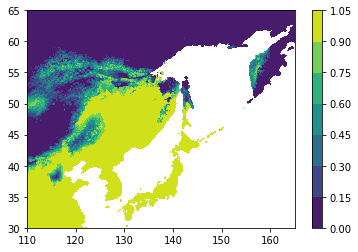

In [98]:
from pylab import *
contourf(lons, lats, cont.reshape(500,500))
colorbar()
show()